In [223]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [114]:
data1 = pd.read_csv('C:\\Users\\dell\\Desktop\\Project Competitions\\Anlayticsvidhya\\TRAIN.csv',parse_dates = True)
data1
#If there is holiday on the given Date, 1 : Yes, 0 : No

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41


In [327]:
data = data1.copy()
data['Date'] = pd.to_datetime(data['Date'])
data.drop('ID', axis =1, inplace = True)
data.nunique()

Store_id           365
Store_Type           4
Location_Type        5
Region_Code          4
Date               516
Holiday              2
Discount             2
#Order             299
Sales            47422
dtype: int64

In [328]:
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data['weekofyear']= data['Date'].dt.isocalendar().week
data['day'] = data['Date'].dt.day

In [131]:
data.isna().sum(),data.dtypes

(Store_id         0
 Store_Type       0
 Location_Type    0
 Region_Code      0
 Date             0
 Holiday          0
 Discount         0
 #Order           0
 Sales            0
 dtype: int64,
 Store_id                  int64
 Store_Type               object
 Location_Type            object
 Region_Code              object
 Date             datetime64[ns]
 Holiday                   int64
 Discount                 object
 #Order                    int64
 Sales                   float64
 dtype: object)

In [101]:
data.loc[data.duplicated(), :]

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales


In [330]:
data

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,month,year,weekofyear,day
0,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,1,2018,1,1
1,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,1,2018,1,1
2,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,1,2018,1,1
3,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,1,2018,1,1
4,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,1,2018,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00,5,2019,22,31
188336,153,S4,L2,R1,2019-05-31,1,No,90,54572.64,5,2019,22,31
188337,154,S1,L3,R2,2019-05-31,1,No,56,31624.56,5,2019,22,31
188338,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41,5,2019,22,31


In [139]:
data.groupby('Store_Type')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Store_Type,,,,,,,,
S1,88752.0,37676.511694,12303.151090,0.00,29859.0,36444.0,44439.00,143841.0
S2,28896.0,27530.828222,9168.839395,1748.28,21666.0,26794.5,32703.90,96363.0
S3,24768.0,47063.068209,14907.465521,0.00,37656.0,45445.5,55062.75,166323.0
S4,45924.0,59945.685926,20750.228035,0.00,46503.0,57075.0,70326.75,247215.0


In [147]:
data.groupby('Location_Type')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Location_Type,,,,,,,,
L1,85140.0,41453.597889,13520.616642,0.00,32598.00,39831.000,48702.000,144789.0
L2,48504.0,59231.480373,20642.975708,0.00,45731.25,56235.975,69555.000,247215.0
L3,29928.0,33072.257756,10720.509117,0.00,26119.98,31987.200,39084.000,117495.0
L4,10836.0,29067.414313,9176.431608,1969.14,23075.25,28554.000,34413.750,91677.0
L5,13932.0,25187.787261,8990.099353,1748.28,19416.00,24528.000,30395.235,86203.2


In [148]:
data.groupby('Region_Code')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Region_Code,,,,,,,,
R1,63984.0,46765.488405,21286.095441,0.0,32091.00,43125.0,57624.00,247215.0
R2,54180.0,40054.847344,16468.619529,0.0,29078.25,37548.0,48357.00,192156.0
R3,44376.0,42144.517063,16615.730308,0.0,30876.00,39661.5,50970.75,227127.0
R4,25800.0,39743.434249,15930.494396,2009.7,29195.64,37474.5,47796.00,161271.0


In [149]:
data.groupby(['Holiday','Discount'])['Sales'].describe()

count          mean           std      min       25%  \
Holiday Discount                                                           
0       No        90958.0  38231.567339  15544.175750     0.00  27891.00   
        Yes       72562.0  50999.390797  18662.008796  9333.00  38052.00   
1       No        13093.0  31652.285357  18114.760390     0.00  20718.00   
        Yes       11727.0  39694.061811  18691.525093  1969.14  27911.16   

                       50%        75%        max  
Holiday Discount                                  
0       No        35391.00  45438.000  184992.00  
        Yes       47478.00  60066.000  247215.00  
1       No        29759.40  40692.300  197840.61  
        Yes       37582.02  49511.595  165602.28

<AxesSubplot:xlabel='month', ylabel='Sales'>

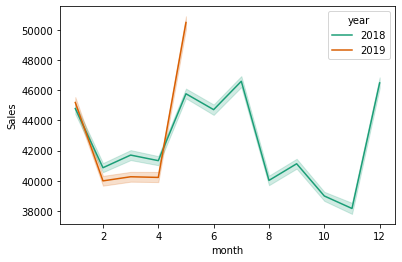

In [176]:
import seaborn as sns

sns.lineplot(data = data, x= 'month', y = 'Sales',  palette= 'Dark2',hue = 'year')

<AxesSubplot:xlabel='month', ylabel='Sales'>

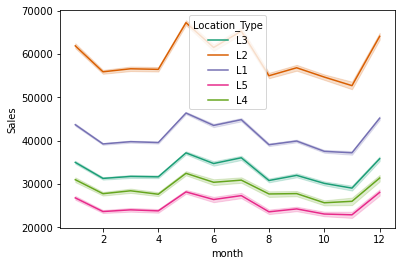

In [163]:
sns.lineplot(data = data, x= 'month', y = 'Sales', hue = 'Location_Type', palette= 'Dark2')

<AxesSubplot:xlabel='month', ylabel='Sales'>

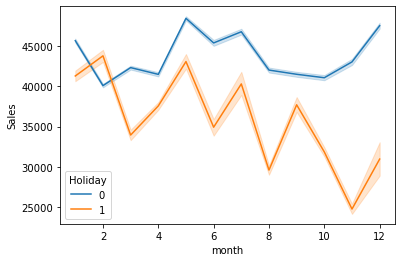

In [169]:
sns.lineplot(data = data, x= 'month', y = 'Sales', hue = 'Holiday')

<AxesSubplot:xlabel='month', ylabel='Sales'>

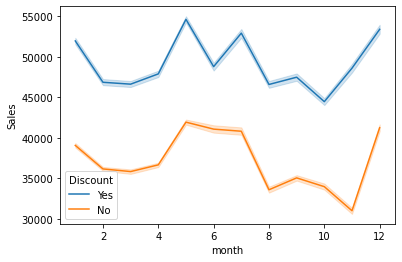

In [170]:
sns.lineplot(data = data, x= 'month', y = 'Sales', hue = 'Discount')

<AxesSubplot:xlabel='month', ylabel='Sales'>

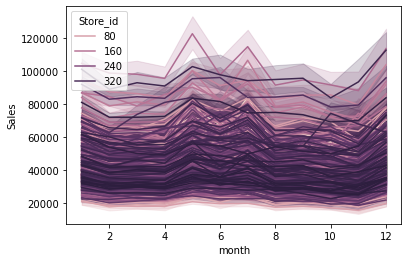

In [185]:
sns.lineplot(data = data, x= 'month', y = 'Sales', hue = 'Store_id')

In [203]:
x = data.groupby('Store_id')['Sales'].describe()
x.sort_values(by = 'mean', ascending= False).head()

,count,mean,std,min,25%,50%,75%,max
Store_id,,,,,,,,
175,516.0,101860.959593,31750.856434,10250.46,80974.50,98206.080,116753.5425,247215.0
337,516.0,95624.840930,26078.182590,8674.38,77724.00,92689.500,111471.0000,219984.0
126,516.0,89829.128895,23334.736839,9794.25,75035.04,87647.475,103426.5000,192156.0
312,516.0,86996.740756,19250.284643,10335.78,75165.75,85990.500,98819.2500,142194.0
146,516.0,84685.447035,23557.880465,10615.23,69873.00,81852.000,97923.7500,205605.0


In [274]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

encoder = LabelEncoder()
data[['Store_Type','Location_Type','Region_Code','Discount']] = data[['Store_Type','Location_Type','Region_Code','Discount']].apply(encoder.fit_transform)

scaler = StandardScaler()
data[['month','year','weekofyear','weekofyear']]= pd.DataFrame(scaler.fit_transform(data[['month','year','weekofyear','weekofyear']]))

In [280]:
data.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,month,year,weekofyear,day
0,1,0,2,0,2018-01-01,1,1,9,7011.84,-1.323177,-0.643194,-1.424738,1
1,253,3,1,0,2018-01-01,1,1,60,51789.12,-1.323177,-0.643194,-1.424738,1
2,252,2,1,0,2018-01-01,1,1,42,36868.20,-1.323177,-0.643194,-1.424738,1
3,251,1,2,0,2018-01-01,1,1,23,19715.16,-1.323177,-0.643194,-1.424738,1
4,250,1,2,3,2018-01-01,1,1,62,45614.52,-1.323177,-0.643194,-1.424738,1




## Time-Series Analysis per Store Type¶





In [275]:
data[data['Store_id'] ==1]

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,month,year,weekofyear,day
0,1,0,2,0,2018-01-01,1,1,9,7011.84,-1.323177,-0.643194,-1.424738,1
607,1,0,2,0,2018-01-02,0,1,60,42369.00,-1.323177,-0.643194,-1.424738,2
1046,1,0,2,0,2018-01-03,0,1,72,50037.00,-1.323177,-0.643194,-1.424738,3
1207,1,0,2,0,2018-01-04,0,1,64,44397.00,-1.323177,-0.643194,-1.424738,4
1752,1,0,2,0,2018-01-05,0,1,63,47604.00,-1.323177,-0.643194,-1.424738,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186569,1,0,2,0,2019-05-27,0,1,53,33075.00,-0.146513,1.554741,-0.002756,27
187165,1,0,2,0,2019-05-28,0,1,57,37317.00,-0.146513,1.554741,-0.002756,28
187391,1,0,2,0,2019-05-29,0,1,69,44652.00,-0.146513,1.554741,-0.002756,29
187962,1,0,2,0,2019-05-30,0,1,66,42387.00,-0.146513,1.554741,-0.002756,30


In [278]:
store1 = data[data['Store_id'] ==1]
store1 = store1.drop(['Date','#Order'], axis = 1)


In [261]:
store1.nunique()

Store_id           1
Store_Type         1
Location_Type      1
Region_Code        1
Holiday            2
Discount           2
Sales            505
month             12
year               2
weekofyear        52
day               31
dtype: int64

In [277]:
from sklearn.model_selection import train_test_split



In [287]:
datasort = data[['Date','Store_id','Sales']]

datasort.set_index(['Date','Store_id'], inplace= True)
datasort.head()

Sales
Date       Store_id          
2018-01-01 1          7011.84
           253       51789.12
           252       36868.20
           251       19715.16
           250       45614.52

In [320]:
lag_features = datasort.unstack().shift(1)
lag_features = lag_features.iloc[1:,]
lag_features = lag_features.droplevel(level =0, axis =1)

In [323]:
lag_features[[1]].values

array([[ 7011.84],
       [42369.  ],
       [50037.  ],
       [44397.  ],
       [47604.  ],
       [24495.  ],
       [36855.  ],
       [34101.  ],
       [42429.  ],
       [33510.  ],
       [36873.  ],
       [25644.  ],
       [40890.  ],
       [39254.4 ],
       [51993.  ],
       [37716.  ],
       [41232.  ],
       [17361.  ],
       [29322.  ],
       [31971.  ],
       [44625.  ],
       [44178.75],
       [28086.  ],
       [47835.  ],
       [45384.  ],
       [25868.88],
       [50589.  ],
       [65958.  ],
       [45903.  ],
       [16302.  ],
       [15812.94],
       [27306.  ],
       [34035.  ],
       [32616.  ],
       [31974.  ],
       [18750.  ],
       [31098.  ],
       [33282.  ],
       [44922.  ],
       [38169.  ],
       [38169.  ],
       [20403.  ],
       [25017.  ],
       [28170.  ],
       [26761.5 ],
       [29091.  ],
       [26784.  ],
       [20640.  ],
       [36312.  ],
       [36312.  ],
       [43086.  ],
       [42207.  ],
       [4007

In [324]:
store1lag = store1.drop(0, axis =0)
store1lag['lagfea']= lag_features[[1]].values

In [325]:
store1lag

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,month,year,weekofyear,day,lagfea
607,1,0,2,0,0,1,42369.00,-1.323177,-0.643194,-1.424738,2,7011.84
1046,1,0,2,0,0,1,50037.00,-1.323177,-0.643194,-1.424738,3,42369.00
1207,1,0,2,0,0,1,44397.00,-1.323177,-0.643194,-1.424738,4,50037.00
1752,1,0,2,0,0,1,47604.00,-1.323177,-0.643194,-1.424738,5,44397.00
2162,1,0,2,0,0,0,24495.00,-1.323177,-0.643194,-1.424738,6,47604.00
...,...,...,...,...,...,...,...,...,...,...,...,...
186569,1,0,2,0,0,1,33075.00,-0.146513,1.554741,-0.002756,27,25035.00
187165,1,0,2,0,0,1,37317.00,-0.146513,1.554741,-0.002756,28,33075.00
187391,1,0,2,0,0,1,44652.00,-0.146513,1.554741,-0.002756,29,37317.00
187962,1,0,2,0,0,1,42387.00,-0.146513,1.554741,-0.002756,30,44652.00
